# Spectra in **``pycoco``**

---------------------

## Introduction
This notebook aims to serve as a short tutorial (along with the others in this directory). In this notebook, the tools for adding/testing/plotting spectra in **`pycoco`**, as a companion to the **`c`** code **`CoCo`**.
**`pycoco`** can be used to (*hopefully*) easily wrangle your exisiting spectra into the correct location/format.

In [44]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc
import astropy.units as u

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.py'>

## Using **`SpectrumClass`**
----

### **`SpectrumClass`** Methods and Variables

TBA


In [45]:
S = pcc.SpectrumClass()

In [46]:
S.__dict__.keys()

['_default_list_dir_path', 'data_directory', '_default_data_dir_path']

In [47]:
spec_filename = "SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat"
S.load(spec_filename)

You didn't supply a directory, so using self.data_directory
Reading /Users/berto/Code/verbose-enigma/testdata/spec/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat


In [48]:
S.data.show_in_notebook(display_length = 5)

idx,wavelength,flux
,Angstrom,erg / (cm2 s)
0,3501.0719747,3.518436e-15
1,3503.73082825,3.437713e-15
2,3506.38968179,3.381749e-15
3,3509.04853533,3.393402e-15
4,3511.70738888,3.499029e-15
5,3514.36624242,3.484047e-15
6,3517.02509596,3.625367e-15
7,3519.6839495,3.470825e-15
8,3522.34280305,3.560706e-15


In [49]:
spec_table = S.data
wmin = 3500
wmax = 11000

In [50]:
spec_table[np.bitwise_and(spec_table['wavelength'] > wmin, spec_table['wavelength'] < wmax )]

wavelength,flux
Angstrom,erg / (cm2 s)
float64,float64
3501.0719747,3.518436e-15
3503.73082825,3.437713e-15
3506.38968179,3.381749e-15
3509.04853533,3.393402e-15
3511.70738888,3.499029e-15
3514.36624242,3.484047e-15
3517.02509596,3.625367e-15
3519.6839495,3.470825e-15


{'_meta': OrderedDict([('filename', '/Users/berto/Code/verbose-enigma/testdata/spec/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x1107d0ad0>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux')>, 'primary_key': None}


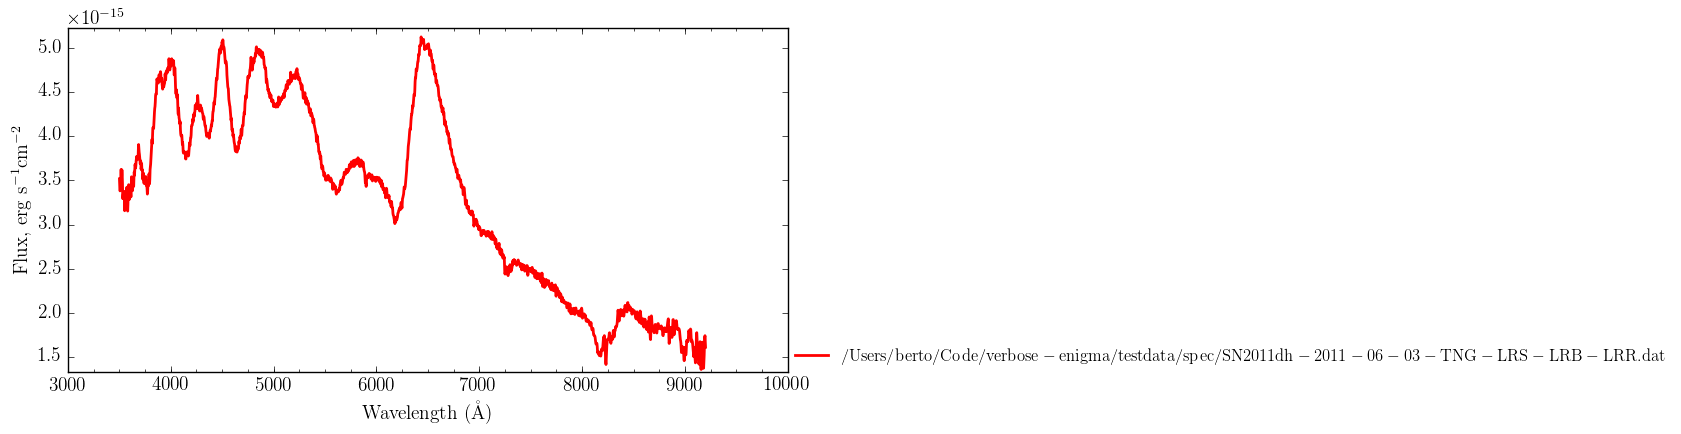

In [51]:
S.plot()

In [52]:
S.__dict__.keys()

['_default_data_dir_path',
 'flux',
 'data_directory',
 'wavelength',
 'data',
 '_default_list_dir_path']

In [53]:
c = pcc.extinction.unred(S.wavelength, S.flux, EBV_MW = 0.1)

In [54]:
S.set_EBV(0.1)

In [55]:
S.deredden()

Foo


In [56]:
S.data.show_in_notebook(display_length = 5)

idx,wavelength,flux,flux_dered
,Angstrom,erg / (cm2 s),erg / (cm2 s)
0,3501.0719747,3.518436e-15,5.54215405491e-15
1,3503.73082825,3.437713e-15,5.41397950904e-15
2,3506.38968179,3.381749e-15,5.32484260327e-15
3,3509.04853533,3.393402e-15,5.34219184951e-15
4,3511.70738888,3.499029e-15,5.50745321118e-15
5,3514.36624242,3.484047e-15,5.48285444287e-15
6,3517.02509596,3.625367e-15,5.70419611203e-15
7,3519.6839495,3.470825e-15,5.46003291274e-15
8,3522.34280305,3.560706e-15,5.60039986516e-15


{'_meta': OrderedDict([('filename', '/Users/berto/Code/verbose-enigma/testdata/spec/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x1107d0ad0>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_dered')>, 'primary_key': None}


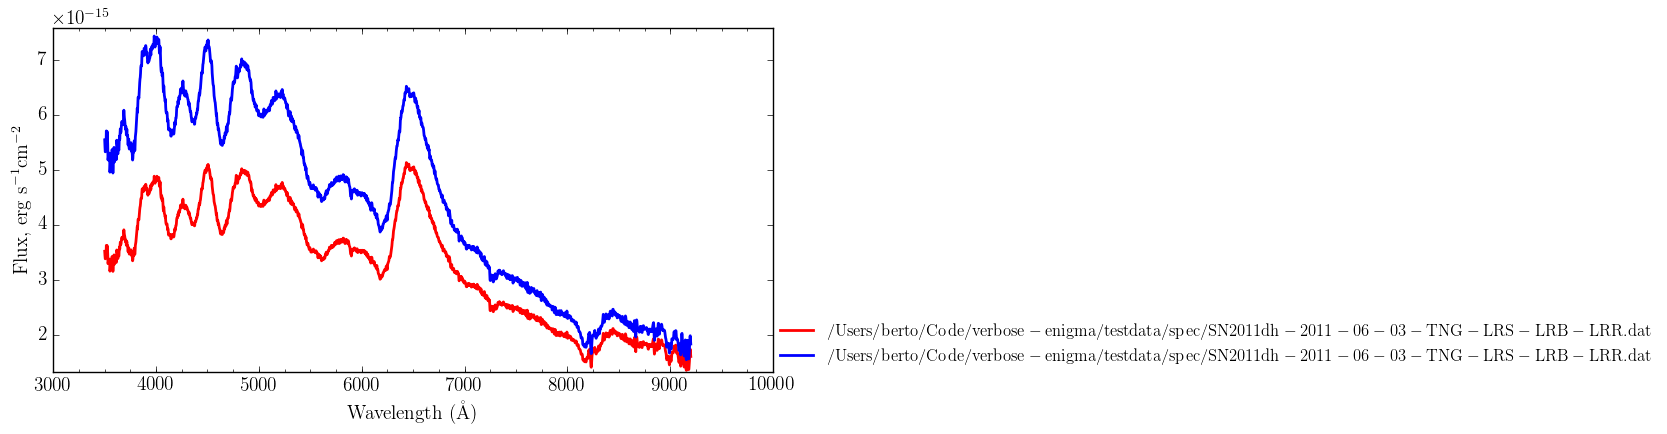

In [57]:
S.plot()

In [58]:
S.flux[0:5]

3.518436e-15
3.437713e-15
3.381749e-15
3.393402e-15
3.499029e-15


In [59]:
S.use_flux_dered()

In [60]:
S.flux[0:5]

5.54215405491e-15
5.41397950904e-15
5.32484260327e-15
5.34219184951e-15
5.50745321118e-15


{'_meta': OrderedDict([('filename', '/Users/berto/Code/verbose-enigma/testdata/spec/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x1107d0ad0>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_dered')>, 'primary_key': None}


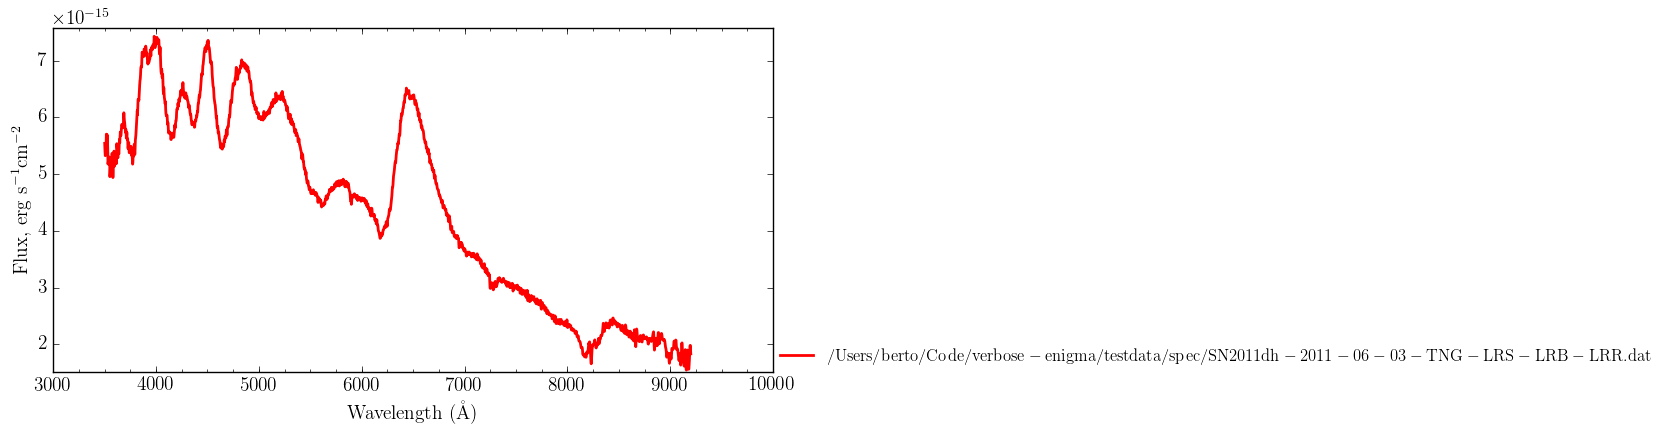

In [61]:
S.plot(compare_red = False)

In [62]:
S.get_MJD_obs()

TypeError: get_MJD_obs() takes at least 2 arguments (1 given)

In [ ]:
S.save("TEST.dat", squash = True)